# Exploratory Data Analysis: Univariate Analysis

## Defining the Question

### a) Specifying the Question

Which individuals are most likely to have or use a bank account?

### Defining the Metric for Success

Predict which individuals are most likely to have or use a bank account

### c) Understanding the context

Overview

Financial Inclusion remains one of the main obstacles to economic and human development in Africa. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 13.9% of the adult population) have access to or use a commercial bank account.

Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion. Despite the proliferation of mobile money in Africa and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services. Access to bank accounts enables households to save and facilitate payments while also helping businesses build up their credit-worthiness and improve their access to other financial services. Therefore, access to bank accounts is an essential contributor to long-term economic growth.

The research problem is to figure out how we can predict which individuals are most likely to have or use a bank account. Your solution will help provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.

### d) Recording the Experimental Design

1) Reading the Data
2) Checking the Data
3) External Data Source Validation
4) Tidying the Dataset
5) Central measures of Dispersions
6) Exploratory Analysis
7)Implementing the Solution
8)Challenging the solution
9)Follow-up questions
10)Recommendations

### e) Data Relevance

Our dataset contains 23524 rows and 13 columns. Each variable has been thoroughly explained by the variables definition file.

## 2. Reading the Data

In [ ]:
#Importing all the necessary libraries to be used for the analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#importing the variable definitions
Variable_Definitions = pd.read_csv('Variable_Definitions.csv')
Variable_Definitions

,Variable,Definitions
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


In [ ]:
# Loading the Data from the source i.e. csv
# Dataset url = http://bit.ly/FinancialDataset
#
url= 'http://bit.ly/FinancialDataset'
Financial_Data= pd.read_csv(url)
Financial_Data


,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed


## 3. Checking the Data

In [ ]:
# Determining the no. of records in our dataset
#
print(Financial_Data.shape)

(23524, 13)


The total records the dataset are 23524 rows with 13 columns.

In [ ]:
# Previewing the top of our dataset
#
Financial_Data.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
# Previewing the bottom of our dataset
# 
Financial_Data.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [ ]:
# Checking whether each column has an appropriate datatype
#
Financial_Data.dtypes

Country                    object
Year                        int64
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
Household_Size            float64
Respondent_Age            float64
Gender                     object
Relationship_With_Head     object
Marital_Status             object
Level of Educuation        object
Type of Job                object
dtype: object

In [ ]:
Financial_Data.describe()

,Year,Household_Size,Respondent_Age
count,23343.000000,23343.000000,23343.000000
mean,2016.980594,3.688643,38.805509
std,0.901740,2.281184,16.519803
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


The output visibly shows that the mean of the household size is 3 and that of the respondent age is 38. The standard deviation for the same is 16.52 and 2.28 as they are derived from the mean. The interquartile ranges and the ranges have also been displayed.

## 4. Central measures of Dispersion

In [ ]:
#Finding the mean of the numerical values
#
Categorical_Columns=list(Financial_Data.columns)
Categorical_Columns.remove('Respondent_Age')
Categorical_Columns.remove('Household_Size')
Numerical_Columns= ['Respondent_Age','Household_Size']

Financial_Data[Numerical_Columns].mean()

Respondent_Age    38.805509
Household_Size     3.688643
dtype: float64

In [ ]:
#Finding the mode of the numerical values
Financial_Data[Numerical_Columns].mode()

,Respondent_Age,Household_Size
0,30.0,2.0


## 5. External Data Source Validation

### a) Validation

The data available on the world bank data was not exhaustive to enable us carry out the validation.More data is being sourced out to enable our data validation.

## 6. Tidying the Dataset

In [ ]:
#checking for duplicates
Financial_Data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
23519    False
23520    False
23521    False
23522    False
23523    False
Length: 23524, dtype: bool

In [ ]:
# Identifying the Missing Data
#
Financial_Data.isnull().any()

country                    True
year                      False
uniqueid                  False
Has a Bank account         True
Type of Location           True
Cell Phone Access          True
household_size             True
Respondent Age             True
gender_of_respondent       True
The relathip with head     True
marital_status             True
Level of Educuation        True
Type of Job                True
dtype: bool

In [ ]:
#Dropping missing values
Financial_Data.dropna(inplace = True)
Financial_Data

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed


Dropping the missing values did not lead to losing a lot of data

In [ ]:
# Checking the values of the Missing Data after dropping them
#
Financial_Data.isnull().sum()

country                   0
year                      0
uniqueid                  0
Has a Bank account        0
Type of Location          0
Cell Phone Access         0
household_size            0
Respondent Age            0
gender_of_respondent      0
The relathip with head    0
marital_status            0
Level of Educuation       0
Type of Job               0
dtype: int64

In [ ]:
#dropping the Uniqueid column
Financial_Data.drop('uniqueid', axis=1,inplace=True)
Financial_Data.head()

,country,year,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
#Renaming the columns
Financial_Data = Financial_Data.rename(columns = {
    'country' : 'Country',
    'year' : 'Year',
    'household_size' : 'Household_Size',
    'gender_of_respondent' : 'Gender',
    'The relathip with head' : 'Relationship_With_Head',
    'marital_status' : 'Marital_Status',
    'Level_of_Educuation' : 'Level_of_Education',
    'Respondent Age' : 'Respondent_Age'

})
Financial_Data.head(5)

,Country,Year,Has a Bank account,Type of Location,Cell Phone Access,Household_Size,Respondent_Age,Gender,Relationship_With_Head,Marital_Status,Level of Educuation,Type of Job
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
#Dropping the predicted years in our data
print(Financial_Data.Year.unique())
Financial_Data.drop(Financial_Data[Financial_Data.Year > 2018].index, inplace=True)

[2018 2029 2056 2016 2039 2017]


The reasons behind dropping the predicted years is to have more accurate data to use in the analysis.The provided surveys also range from 2016 to 2018.

In [ ]:
# Checking for Outliers
#
#Calculating the first Quantile
Q1= Financial_Data.quantile(0.25)

#Calculating the Third Quantile
Q3= Financial_Data.quantile(0.75)

#Calculating the Quantile Range
IQR= Q3-Q1

print((Financial_Data < (Q1 - 1.5 * IQR)) | (Financial_Data > (Q3 + 1.5 * IQR)))
print('.........................................................................')

#Displaying the number of existing outliers
print(IQR)

#The dataset has 3 outliers in the year, household size and respondent age columns as shown in the output.

       Cell Phone Access  Country  Gender  Has a Bank account  Household_Size  \
0                  False    False   False               False           False   
1                  False    False   False               False           False   
2                  False    False   False               False           False   
3                  False    False   False               False           False   
4                  False    False   False               False           False   
...                  ...      ...     ...                 ...             ...   
23519              False    False   False               False           False   
23520              False    False   False               False           False   
23521              False    False   False               False           False   
23522              False    False   False               False           False   
23523              False    False   False               False            True   

       Level of Educuation 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  if sys.path[0] == '':


The visualization below shows the outliers of the respondent age column are between the ages of 80-100. These are the senior citizens who are not tech savvy and might not even own a phone nor have a bank account. Having that in mind, the best solution for our analysis is to remove them from the records.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


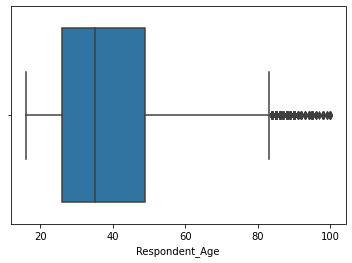

In [ ]:
#Plotting outliers for the Respondent_Age column using boxplot
sns.boxplot(Financial_Data['Respondent_Age'])

The visualization below shows that there are outliers in a household size bigger than 10. Considering our previous observation in the central measures of dispersion, the mean of a household size was 3 therefore anything above that will be removed from the records.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


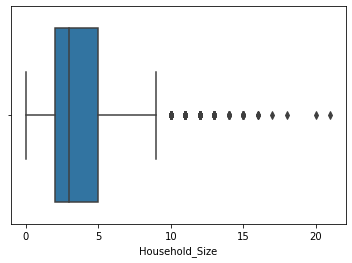

In [ ]:
#Plotting outliers for the Household_Size column using boxplot
sns.boxplot(Financial_Data['Household_Size'])

In [ ]:
# Removing outliers based on the IQR range
# ---
# 
Q1= Financial_Data.quantile(0.25)
Q3 = Financial_Data.quantile(0.75)
IQR = Q3-Q1
IQR

Financial_Records_out = Financial_Data[~((Financial_Data < (Q1 - 1.5 * IQR)) |(Financial_Data > (Q3 + 1.5 * IQR))).any(axis=1)]
Financial_Records_out.shape

# Printing the shape of our new and former dataset 
# ---
# 
print(Financial_Records_out.shape)
print(Financial_Data.shape)

(22725, 12)
(23340, 12)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  if __name__ == '__main__':


In [ ]:
Financial_Records_out = Financial_Data[~((Financial_Data < (Q1 - 1.5 * IQR)) |(Financial_Data > (Q3 + 1.5 * IQR))).any(axis=1)]
Financial_Records_out.head()

# # Printing the shape of our new and former dataset 
# # ---
# # 
# print(Financial_Records_out.shape)
# print(Financial_Data.shape)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """Entry point for launching an IPython kernel.


,Country,Year,Has a Bank account,Type of Location,Cell Phone Access,Household_Size,Respondent_Age,Gender,Relationship_With_Head,Marital_Status,Level of Educuation,Type of Job
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
Financial_Records_out.kurt()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Year             -1.601466
Household_Size   -0.505578
Respondent_Age   -0.237494
dtype: float64

kurtosis of less than –1 indicates a distribution that is too flat and has lighter tails as seen in our data.
This is considered as a nonnormal distribution.


In [ ]:
#Checking for Anomalies
# Calculating our first and third quantiles which will aid in getting the IQR
#that will also be displayed
#
Q1= Financial_Records_out.quantile(0.25)
Q3 = Financial_Records_out.quantile(0.75)
IQR = Q3-Q1
IQR

Year               2.0
Household_Size     3.0
Respondent_Age    22.0
dtype: float64

In [ ]:
#checking for the skew of our data
Financial_Records_out.skew()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


Year              0.060351
Household_Size    0.605875
Respondent_Age    0.740214
dtype: float64

A value between 0.5 and 1 is moderately skewed therefore our data is moderately skewed indicating the variables on the right tail are more than those on the left tail.

In [ ]:
#Finding the standard deviation
print(Financial_Records_out['Respondent_Age'].std())
print(Financial_Records_out['Household_Size'].std())

15.806141256107674
2.080542136724138


In [ ]:
#Finding the variance
print(Financial_Records_out['Respondent_Age'].var())
print(Financial_Records_out['Household_Size'].var())

249.83410140802906
4.328655582684643


In [ ]:
#Finding the range of the respondent ages
Respondent_Age_max = Financial_Records_out["Respondent_Age"].max()
print(Respondent_Age_max)
Respondent_Age_min = Financial_Records_out["Respondent_Age"].min()
print(Respondent_Age_min)

# Calculating the range
Respondent_Age_max - Respondent_Age_min

83.0
16.0


67.0

It's safe to say that the ages in record are between 16-83

In [ ]:
#Finding the range of the household size
Household_Size_max = Financial_Records_out["Household_Size"].max()
print(Household_Size_max)
Household_Size_min = Financial_Records_out["Household_Size"].min()
print(Household_Size_min)

# Calculating the range
Household_Size_max - Household_Size_min

9.0
0.0


9.0

The households have between 0 to 9 members

## 7. Exploratory Analysis

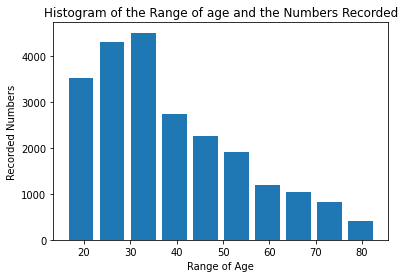

In [ ]:
# Plotting the univariate summaries and recording our observations in a histogram
Age = Financial_Records_out['Respondent_Age']
Age
plt.hist(Age, bins=10, histtype='bar', rwidth=0.8)
plt.xlabel('Range of Age')
plt.ylabel('Recorded Numbers')
plt.title('Histogram of the Range of age and the Numbers Recorded')
plt.show()

The display shows people between the ages of 25-35 have the highest records and the least being the age of 80 and above.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Recorded Numbers')

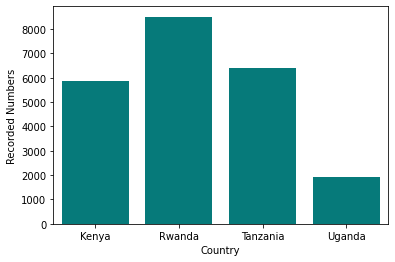

In [ ]:
#Now to find out which country had the the highest records using a histogram
sns.countplot(Financial_Records_out.Country, color='Teal',saturation=0.9)
plt.xlabel('Country')
plt.ylabel('Recorded Numbers')

Rwanda had the highest records as clearly shown in the visualization.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Numbers Recorded')

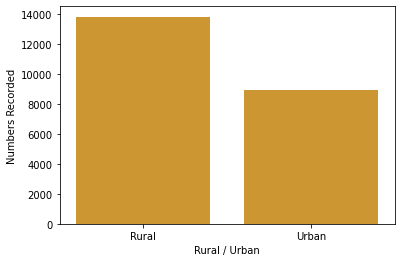

In [ ]:
#Checking which location had the highest records
sns.countplot(Financial_Records_out['Type of Location'], color='Orange',saturation=0.6)
plt.xlabel('Rural / Urban')
plt.ylabel('Numbers Recorded')

It is evident that the rural areas had more records than the urban areas.

## Bivariate Analysis

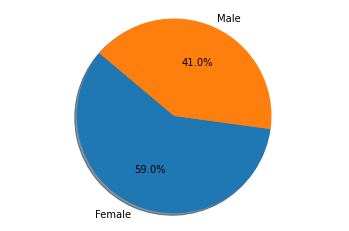

In [ ]:
#Check which gender had more records. A pie chart will be used as it gives
#better visualization for gender
FinancialData = Financial_Records_out[['Country','Gender']]
New_Data = FinancialData.groupby('Gender')['Country'].count()
New_Data =pd.DataFrame({'Gender':New_Data.index, 'Country':New_Data.values})
New_Data
country= New_Data['Country']
Bank_Account= New_Data['Gender']
plt.pie(country, labels=Bank_Account, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

The pie chart clearly shows that more females were recorded than males.

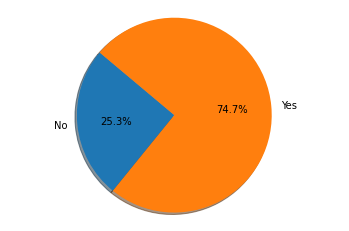

In [ ]:
#Check if the respondents have access to mobile phones
FinancialData = Financial_Records_out[['Respondent_Age','Cell Phone Access']]
New_Data = FinancialData.groupby('Cell Phone Access')['Respondent_Age'].count()
New_Data =pd.DataFrame({'Cell Phone Access':New_Data.index, 'Respondent_Age':New_Data.values})
New_Data
country= New_Data['Respondent_Age']
Bank_Account= New_Data['Cell Phone Access']
plt.pie(country, labels=Bank_Account, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

The pie chart shows that more people have access to mobile phones.

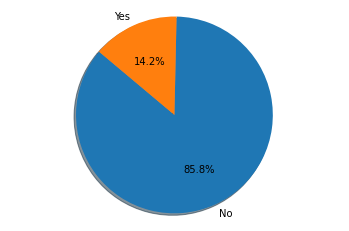

In [ ]:
#Check if the respondents have bank accounts
FinancialData = Financial_Records_out[['Respondent_Age','Has a Bank account']]
New_Data = FinancialData.groupby('Has a Bank account')['Respondent_Age'].count()
New_Data =pd.DataFrame({'Has a Bank account':New_Data.index, 'Respondent_Age':New_Data.values})
New_Data
country= New_Data['Respondent_Age']
Bank_Account= New_Data['Has a Bank account']
plt.pie(country, labels=Bank_Account, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

The pie chart clearly shows that most people recorded did not have bank accounts.

### Scatter Plot

The simplest bivariate plot is the scatter plot. A simple scatter plot simply maps each variable of interest to a point in two-dimensional space.

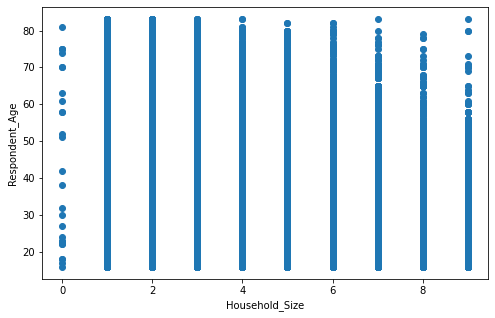

In [ ]:
#creating a visualization using scatter plot to show the relationship between
#the household size and respondent age variables
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(Financial_Records_out['Household_Size'], Financial_Records_out['Respondent_Age'])
ax.set_xlabel('Household_Size')
ax.set_ylabel('Respondent_Age')
plt.show()

### Heat Map

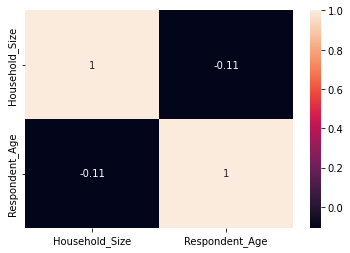

In [ ]:
#Plotting a Heat map on respondent Age and household size to show correlation
#but first we will assign a common variable to the Respondent age and Household size variables
#for easy plotting
Household_Age = Financial_Records_out[['Household_Size', 'Respondent_Age']]
sns.heatmap(Household_Age.corr(),annot=True)
plt.show()

In [ ]:
#Displaying the statistics from researchpy.summary_cont()
# --- 
!pip install researchpy
import researchpy as rp


rp.summary_cont(Financial_Records_out.groupby("Has a Bank account")['Respondent_Age'])

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,N,Mean,SD,SE,95% Conf.,Interval
Has a Bank account,,,,,,
No,19490,38.1830,16.0889,0.1152,37.9571,38.4089
Yes,3235,39.3422,13.9430,0.2451,38.8615,39.8228


## Multivariate Analysis-LDA

In [ ]:
#Checking our dataset
Financial_Records_out.head()

,Country,Year,Has a Bank account,Type of Location,Cell Phone Access,Household_Size,Respondent_Age,Gender,Relationship_With_Head,Marital_Status,Level of Educuation,Type of Job
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
#Step 1:Making a copy of our dataset to aid in the multivariate analysis
#since we do not want to alter with our previous analyses
Financial_RecordsCopy = Financial_Records_out.copy()
Financial_RecordsCopy

,Country,Year,Has a Bank account,Type of Location,Cell Phone Access,Household_Size,Respondent_Age,Gender,Relationship_With_Head,Marital_Status,Level of Educuation,Type of Job
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...
23512,Uganda,2018,No,Rural,No,2.0,57.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23519,Uganda,2018,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income


In [ ]:
#Step 2:converting the strings in the fields to numerical values to help in the analysis
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
Financial_RecordsCopy['Country']=lb.fit_transform(Financial_RecordsCopy['Country'].astype(str))
Financial_RecordsCopy['Type of Location']=lb.fit_transform(Financial_RecordsCopy['Type of Location'].astype(str))
Financial_RecordsCopy['Cell Phone Access']=lb.fit_transform(Financial_RecordsCopy['Cell Phone Access'].astype(str))
Financial_RecordsCopy['Gender']=lb.fit_transform(Financial_RecordsCopy['Gender'].astype(str))
Financial_RecordsCopy['Marital_Status']=lb.fit_transform(Financial_RecordsCopy['Marital_Status'].astype(str))
Financial_RecordsCopy['Level of Educuation']=lb.fit_transform(Financial_RecordsCopy['Level of Educuation'].astype(str))
Financial_RecordsCopy['Type of Job']=lb.fit_transform(Financial_RecordsCopy['Type of Job'].astype(str))


In [ ]:
#Step 3: Let's take a look at what our dataset looks like
Financial_RecordsCopy.head()

,Country,Year,Has a Bank account,Type of Location,Cell Phone Access,Household_Size,Respondent_Age,Gender,Relationship_With_Head,Marital_Status,Level of Educuation,Type of Job
0,0,2018,Yes,0,1,3.0,24.0,0,Spouse,2,4,9
1,0,2018,No,0,0,5.0,70.0,0,Head of Household,4,1,4
2,0,2018,Yes,1,1,5.0,26.0,1,Other relative,3,6,9
3,0,2018,No,0,1,5.0,34.0,0,Head of Household,2,3,3
4,0,2018,No,1,0,8.0,26.0,1,Child,3,3,5


In [ ]:
#Step 4: Preprocessing
# The first preprocessing step is to divide the dataset into a feature set and corresponding labels. 
# The following script performs this task. The script below stores the feature sets into the x variable 
# and the series of corresponding labels in to the y variable
X = Financial_RecordsCopy.iloc[:, 7:8].values
y = Financial_RecordsCopy.iloc[:, 1].values

In [ ]:
#Step 5:Splitting the dataset into the Training set and Test set
# The next preprocessing step is to divide data into training and test sets. 
# We execute the following script to do so:
#
#---
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Step 6: Feature scaling 
# We now need to perform feature scaling. We execute the following code to do so:
#---
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Step 7: Applying LDA
# we peforming LDA with Scikit-Learn. 
# we import LinearDiscriminantAnalysis class of the sklearn.discriminant_analysis 

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [ ]:
#Step 8:Performance Evaluation 
# with the help of a confusion matrix and find the accuracy of the prediction.

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))


[[1721    0    0]
 [1273    0    0]
 [1551    0    0]]
Accuracy0.3786578657865787


The algorithm achieved an accuracy of 37.8% as seen with one linear discriminant.
This is not a good model for making prediction as it cannot be used to predict individuals most likely to have or use a bank account.

The visualization shows that most of the banks have access to  phones but country 2 which is Uganda indicates lower records

## 8. Implementing the Solution

In [ ]:
#Displaying the column variables
Financial_RecordsCopy.columns

Index(['Country', 'Year', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'Household_Size', 'Respondent_Age', 'Gender',
       'Relationship_With_Head', 'Marital_Status', 'Level of Educuation',
       'Type of Job'],
      dtype='object')

In [ ]:
#converting the has bank account column to a string 
Financial_RecordsCopy['Has a Bank account']=lb.fit_transform(Financial_RecordsCopy['Has a Bank account'].astype(str))

In [ ]:
#Displaying the rest of the variables used in this analysis
Others = Financial_RecordsCopy[['Has a Bank account', 'Type of Location', 'Country', 'Cell Phone Access', 'Gender', 'Marital_Status', 'Type of Job']]

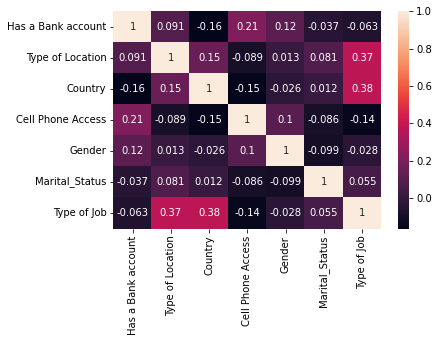

In [ ]:
#creating a heat map to display the correlation of the variables
sns.heatmap(Others.corr(),annot=True)
plt.show()

It can be seen that the correlation of the variables range from -1 to 1
The heat map also shows that there is no relationship between the provided variables and opening of a bank account.

## 9. Challenging the solution

The easy solution is nice because it is, well, easy, but you should never allow those results to hold the day. 
You should always be thinking of ways to challenge the results, 
especially if those results comport with your prior expectation.
We shall perform other analyses to make a prediction.

In [ ]:
#Checking our dataset
#---
Financial_Records_out.head()

,Country,Year,Has a Bank account,Type of Location,Cell Phone Access,Household_Size,Respondent_Age,Gender,Relationship_With_Head,Marital_Status,Level of Educuation,Type of Job
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
# finding the value of kurtosis
#---
Financial_Records_out.kurt()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


Year             -1.601466
Household_Size   -0.505578
Respondent_Age   -0.237494
dtype: float64

The distribution has negative kurtosis values indicating that the distribution has lighter tails than the normal distribution.

In [ ]:
#finding the value of skewness
#---
Financial_Records_out.skew()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


Year              0.060351
Household_Size    0.605875
Respondent_Age    0.740214
dtype: float64

Here, the mean and median are greater than the mode leading to positive skewness meaning the tail on the right side of the distribution is longer.

## 10. Follow up questions

### a). Did we have the right data?

The dataset was not the best to answer the question as it was not up-to-date. The data type was also mostly in string and not integers. The latter does a better job while working on an analysis.

### b). Do we need other data to answer our question?

Other data with up-to-date records and the right datatypes is definitely required to answer the question.

### c). Did we have the right question?

We had the right question but the least helpful dataset to answer it.

## Recommendations

1)A survey should be conducted every half year to ensure that the records being used for analysis are up-to-date. 
2)Rural areas have the least records and banks and tech companies should focus on those areas for business. 
3)Banks in collaboration with Fintech companies should come up with free advertising messages sent to all mobile phone owners to create awareness of the importance of owning a bank account. This information will get to mobile phone users with no bank accounts. 
4)Banks in Uganda should have monthly activations in different parts of the 
country to create awareness of bank accounts, their importance and how to open
one. This will increase the number of people having bank accounts in the country.